# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Score de Crédito dos Clientes

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom


In [22]:
# Bibliotecas
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

---
#### Base de dados

In [2]:
# Importar base de dados
df = pd.read_csv("clientes.csv")
display(df.head(10))

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
5,3392,6,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,8.0,...,270.0,21.465380,alto_gasto_pagamento_medio,340.479212,Good,1,1,1,1,0
6,3392,7,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,271.0,21.465380,baixo_gasto_pagamento_baixo,244.565317,Good,1,1,1,1,0
7,3392,8,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,272.0,21.465380,alto_gasto_pagamento_medio,358.124168,Standard,1,1,1,1,0
8,8625,1,28.0,professor,34847.84,2.0,4.0,6.0,1.0,3.0,...,319.0,39.684018,baixo_gasto_pagamento_baixo,470.690627,Standard,0,0,0,1,0
9,8625,2,28.0,professor,34847.84,2.0,4.0,6.0,1.0,7.0,...,320.0,39.684018,alto_gasto_pagamento_alto,484.591214,Good,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

In [4]:
# Investigar valores duplicados
df.duplicated().any()

np.False_

In [5]:
# Retirar informações inúteis
df = df.drop(columns = "id_cliente", axis = 1)

---
#### Tratamento de dados

In [6]:
# Transformar coluna de texto em número
codificador = LabelEncoder()

# Transformação
for coluna in df.columns:
    if df[coluna].dtype == "object" and coluna != "score_credito":
        df[coluna] = codificador.fit_transform(df[coluna])

# Verificando a transformação
for coluna in df.columns:
    if df[coluna].dtype == "object" and coluna != "score_credito":
        print(coluna)

---
#### Modelo de classificação

In [7]:
# Dados para o treino
x = df.drop("score_credito",axis=1)
y = df["score_credito"]

# Separação dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
# Classificação pelo modelo de árvore de decisão
modelo_arvore = RandomForestClassifier()

#treino
modelo_arvore.fit(x_treino,y_treino)


RandomForestClassifier()

In [9]:
# Classificação pelo modelo KNN (nearest neighbors - vizinhos mais próximos)

#treino
modelo_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

modelo_knn.fit(x_treino, y_treino)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

*Acurácia do Modelo*

In [10]:
# Previsão
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

# Comparação
print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))


0.8255666666666667
0.7458


*Características Importantes para Definir o Score*

In [21]:
# Quais são as características mais importantes para definir o score?
colunas = list(x_teste.columns)
importancia = pd.DataFrame(index=colunas, data=modelo_arvore.feature_importances_,columns=['importancia'])
importancia = importancia*100

importancia = importancia.sort_values(
    by='importancia',
    ascending=False
)
print(importancia)

                          importancia
divida_total                11.316707
mix_credito                  9.188799
juros_emprestimo             8.318734
idade_historico_credito      7.260682
dias_atraso                  6.268909
saldo_final_mes              5.413389
salario_anual                5.103367
taxa_uso_credito             5.077538
investimento_mensal          4.867138
num_pagamentos_atrasados     4.533665
num_verificacoes_credito     4.482158
num_cartoes                  4.364149
idade                        4.250458
mes                          3.942264
num_contas                   3.463503
profissao                    3.274993
num_emprestimos              2.982560
comportamento_pagamento      2.353964
emprestimo_casa              0.729387
emprestimo_credito           0.714264
emprestimo_carro             0.712759
emprestimo_pessoal           0.702269
emprestimo_estudantil        0.678345


*Análise:* A investigação demonstrou que as informações de divida_total, mix_credito e juros_empréstimo são características importantes para definir o score do cliente. 


---
#### Visualização

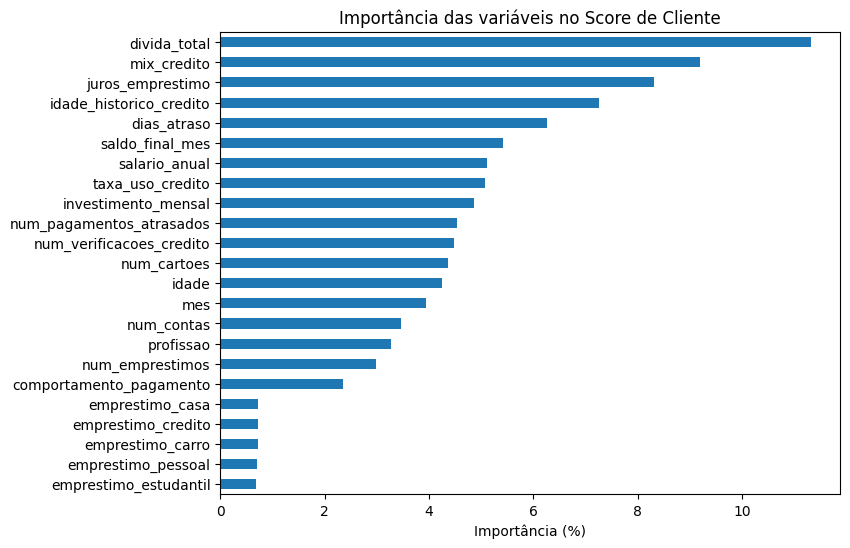

In [23]:
# Gráfico de importância das variáveis
importancia.sort_values('importancia').plot(
    kind='barh',
    figsize=(8, 6),
    legend=False
)

plt.xlabel('Importância (%)')
plt.title('Importância das variáveis no Score de Cliente')
plt.show()


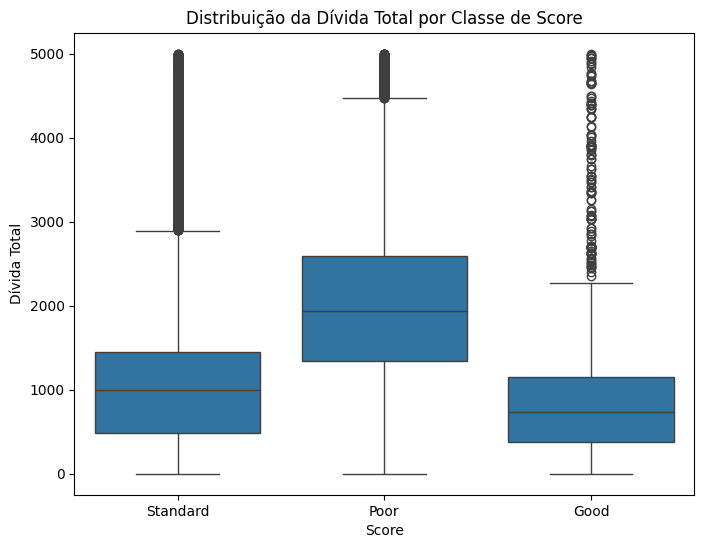

In [24]:
# Relação entre divida_total e score
dados = x_teste.copy()
dados['score'] = y_teste

plt.figure(figsize=(8,6))
sns.boxplot(x='score', y='divida_total', data=dados)

plt.title('Distribuição da Dívida Total por Classe de Score')
plt.xlabel('Score')
plt.ylabel('Dívida Total')
plt.show()

*Análise:* É importante destacar que *alta importância não significa causalidade*, apenas que o modelo usa muito essa variável para separar classes.

Isso significa que o modelo vai de definir o score do cliente levando em consideração mais estas características do que as outras características.

---
#### Base de validação externa

In [33]:
df_novo = pd.read_csv('novos_clientes.csv')
df_novo

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


In [37]:
# Transformação
for coluna in df_novo.columns:
    if df_novo[coluna].dtype == "object":
        df_novo[coluna] = codificador.fit_transform(df_novo[coluna])

In [38]:
# Preparação da base
X_novo = df_novo

# Previsão
y_pred = modelo_arvore.predict(X_novo)

# Acurácia
print(y_pred)

['Poor' 'Good' 'Standard']
